# Loading data

In [6]:
file = open('Royal_data.txt', 'r')
royal_data = file.readlines()
print(royal_data)
file.close()

['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only a man can be a king\n', 'Only a woman can be a queen\n', 'The princess will be a queen\n', 'The prince is a strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'Prince will be king\n', 'A boy will be a man']


# Removing '\n' from the end of every sentence and convert the sentence into lowercase

In [7]:
for i in range(len(royal_data)):
    royal_data[i] = royal_data[i].lower().replace('\n', '')

print(royal_data) 

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a woman can be a queen', 'the princess will be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'a boy will be a man']


# Removing Stopwords

In [8]:
stopwords = ['the', 'is', 'will', 'be', 'a', 'only', 'can', 'their', 'now', 'and', 'at', 'it']

filtered_data = []
for sent in royal_data:
    temp = []
    for word in sent.split():
        if word not in stopwords:
            temp.append(word)
    filtered_data.append(temp)

print(filtered_data)

[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


# Creating Bigrams

In [9]:
bigrams = []
for words_list in filtered_data:
    for i in range(len(words_list) - 1):
        for j in range(i+1, len(words_list)):
            bigrams.append([words_list[i], words_list[j]])
            bigrams.append([words_list[j], words_list[i]])
            

print(bigrams)

[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'king'], ['king', 'man'], ['woman', 'queen'], ['queen', 'woman'], ['princess', 'queen'], ['queen', 'princess'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'boy'], ['boy', 'prince'], ['prince', 'king'], ['king', 'prince'], ['boy', 'man'], ['man', 'boy']]


# Getting a List of Unique Words

In [10]:
all_words = []
for bi in bigrams:
    all_words.extend(bi)

all_words = list(set(all_words))
all_words.sort()

print(all_words)
print("Total number of unique words are:", len(all_words))

['beautiful', 'boy', 'daughter', 'future', 'king', 'man', 'prince', 'princess', 'queen', 'son', 'strong', 'woman']
Total number of unique words are: 12


# Creating dictionary of words

In [11]:
words_dict = {}

counter = 0
for word in all_words:
    words_dict[word] = counter
    counter += 1

print(words_dict)

{'beautiful': 0, 'boy': 1, 'daughter': 2, 'future': 3, 'king': 4, 'man': 5, 'prince': 6, 'princess': 7, 'queen': 8, 'son': 9, 'strong': 10, 'woman': 11}


# Performing One Hot Coding

In [12]:
import numpy as np

onehot_data = np.zeros((len(all_words), len(all_words)))

for i in range(len(all_words)):
    onehot_data[i][i] = 1

onehot_dict = {}
counter = 0
for word in all_words:
    onehot_dict[word] = onehot_data[counter]
    counter += 1

for word in onehot_dict:
    print(word, ":", onehot_dict[word])

beautiful : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
boy : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
daughter : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
future : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
king : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
man : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
prince : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
princess : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
queen : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
son : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
strong : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
woman : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [13]:
X = []
Y = []

for bi in bigrams:
    X.append(onehot_dict[bi[0]])
    Y.append(onehot_dict[bi[1]])
    
X = np.array(X)
Y = np.array(Y)

# Model

In [9]:
pip install keras

                                              0.0/1.1 MB ? eta -:--:--
     -                                        0.0/1.1 MB 1.3 MB/s eta 0:00:01
     -                                        0.0/1.1 MB 487.6 kB/s eta 0:00:03
     ---                                      0.1/1.1 MB 871.5 kB/s eta 0:00:02
     -----                                    0.1/1.1 MB 847.9 kB/s eta 0:00:02
     -------                                  0.2/1.1 MB 980.4 kB/s eta 0:00:01
     --------                                 0.2/1.1 MB 901.1 kB/s eta 0:00:01
     --------                                 0.2/1.1 MB 901.1 kB/s eta 0:00:01
     -----------                              0.3/1.1 MB 863.3 kB/s eta 0:00:01
     -----------                              0.3/1.1 MB 853.3 kB/s eta 0:00:01
     ------------                             0.3/1.1 MB 748.1 kB/s eta 0:00:01
     -------------                            0.4/1.1 MB 768.6 kB/s eta 0:00:01
     -----------------                        0.5/1

In [12]:
pip install --upgrade keras-cv



                                              0.0/613.1 kB ? eta -:--:--
     -                                       30.7/613.1 kB 1.3 MB/s eta 0:00:01
     ----                                  71.7/613.1 kB 787.7 kB/s eta 0:00:01
     ------------                           204.8/613.1 kB 1.4 MB/s eta 0:00:01
     ------------                           204.8/613.1 kB 1.4 MB/s eta 0:00:01
     ------------                           204.8/613.1 kB 1.4 MB/s eta 0:00:01
     ------------------------               399.4/613.1 kB 1.4 MB/s eta 0:00:01
     --------------------------             430.1/613.1 kB 1.5 MB/s eta 0:00:01
     ------------------------------------   593.9/613.1 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 613.1/613.1 kB 1.5 MB/s eta 0:00:00
                                              0.0/5.1 MB ? eta -:--:--
                                              0.1/5.1 MB 4.5 MB/s eta 0:00:02
     -                                        0.2/5.1 MB 

In [1]:
pip install -U tensorflow

  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl (2.1 kB)
                                              0.0/377.0 MB ? eta -:--:--
                                              0.0/377.0 MB 1.3 MB/s eta 0:04:55
                                              0.0/377.0 MB 1.3 MB/s eta 0:04:55
                                            0.1/377.0 MB 655.4 kB/s eta 0:09:36
                                            0.1/377.0 MB 599.1 kB/s eta 0:10:29
                                            0.2/377.0 MB 888.4 kB/s eta 0:07:05
                                            0.2/377.0 MB 888.4 kB/s eta 0:07:05
                                            0.2/377.0 MB 888.4 kB/s eta 0:07:05
                                            0.3/377.0 MB 655.4 kB/s eta 0:09:35
                                            0.3/377.0 MB 807.1 kB/s eta 0:07:47
                                            0.4/377.0 MB 794.9 kB/s eta 0:07:54
                                            0.4/377.0 MB 75

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\debji\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\debji\anaconda3\Lib\site-packages\pip\_internal\cli\req_command.py", line 248, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\debji\anaconda3\Lib\site-packages\pip\_internal\commands\install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "C:\Users\debji\anaconda3\Lib\site-packages\pip\_internal\resolution\resolvelib\resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "C:\Users\debji\anaconda3\Lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
            ^


     -                                     17.1/377.0 MB 421.8 kB/s eta 0:14:14
     -                                     17.1/377.0 MB 421.8 kB/s eta 0:14:14
     -                                     17.1/377.0 MB 421.0 kB/s eta 0:14:15
     -                                     17.1/377.0 MB 421.0 kB/s eta 0:14:15
     -                                     17.2/377.0 MB 419.7 kB/s eta 0:14:18
     -                                     17.2/377.0 MB 419.7 kB/s eta 0:14:18
     -                                     17.2/377.0 MB 419.7 kB/s eta 0:14:18
     -                                     17.2/377.0 MB 421.0 kB/s eta 0:14:15
     -                                     17.2/377.0 MB 421.3 kB/s eta 0:14:14
     -                                     17.2/377.0 MB 421.3 kB/s eta 0:14:14
     -                                     17.3/377.0 MB 420.8 kB/s eta 0:14:15
     -                                     17.3/377.0 MB 421.3 kB/s eta 0:14:14
     -                                 

In [14]:
from keras.models import Sequential
from keras.layers import Dense

embed_size = 2

model = Sequential([
    Dense(embed_size, activation='linear'),
    Dense(Y.shape[1], activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [15]:
model.fit(X, Y, epochs = 1000, batch_size = 256, verbose = False)

In [16]:
weights = model.get_weights()[0]

word_embeddings = {}
for word in all_words:
    word_embeddings[word] = weights[words_dict[word]]

# print(word_embeddings)

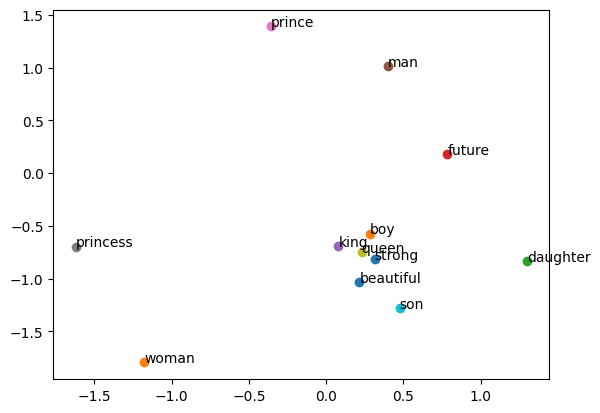

In [17]:
import matplotlib.pyplot as plt

# plt.figure(figsize = (10, 10))
for word in list(words_dict.keys()):
    coord = word_embeddings.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))

plt.savefig('img.jpg')